# Exploratory Data Analysis
This will show us how we can do EDA using Python

## Three important steps to keep in mind are:
1- Understand the data\
2- Clean the data\
3- Find a relationship between data

In [57]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [58]:
# Load dataset
kashti = sns.load_dataset('titanic')

In [62]:
kashti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# 1. Understand the data

In [4]:
# Get columns information
kashti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
# Assign data to a new variable name (concise name)
ks = kashti

In [6]:
# View data (always first thing to do after loading dataset)
ks.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
# Change shape of the data (second thing to do)
ks.shape

(891, 15)

In [8]:
# Summary statistics
ks.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Number of unique values in each column
ks.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [10]:
# Column names
ks.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [11]:
# Unique values in a specific column
ks['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [12]:
ks['sex'].unique()

array(['male', 'female'], dtype=object)

### Assignment
How to find unique values of more than one columns in Pandas?

First we get the columns names in a list in order to create a subset of the original DataFrame, e.g. `df[["col1", "col2"]]`, then we convert the DataFrame into numpy array using `.values` and flatten the array into 1D with `ravel()` method. And, in the end we use `pandas.unique()` method to get the unique values of these columns.

In [13]:
# Get unique values of more than one columns
pd.unique(ks[['who', 'sex']].values.ravel())

array(['man', 'male', 'woman', 'female', 'child'], dtype=object)

# 2. Cleaning and filtering the data

In [14]:
# Find missing values
ks.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [15]:
# Remove most missing values column (cleaning data)
ks_clean = ks.drop(['deck'], axis=1)
ks_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [16]:
# Check drop column
ks_clean.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [17]:
# Check shape
ks_clean.shape

(891, 14)

In [18]:
# Drop rows with missing values
ks_clean = ks_clean.dropna()

In [19]:
# Again check the shape after dropping rows
ks_clean.shape

(712, 14)

In [20]:
# The data is cleaned
ks_clean.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

**Note**: If we lose too much of the data after droping columns and rows that have missing values, in that case we don't remove the missing values rather we replace them with something else.

In [21]:
ks_clean.shape

(712, 14)

In [22]:
ks.shape

(891, 15)

In our case we can bare it because as we can see above we don't lose too much of the data.

In [23]:
# Count values in a column
ks_clean['sex'].value_counts()

male      453
female    259
Name: sex, dtype: int64

In [24]:
ks.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
ks_clean.describe()

,survived,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


Handling missing values can significantly improve the data results. For instance, we have see the survived average `38%` in `ks` data has improved to survived average `40` in `ks_clean`.

### Find outliers

In [26]:
ks_clean.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

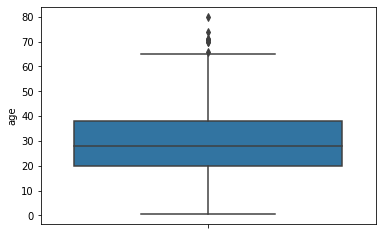

In [27]:
# Visualize columns for outliers with boxplot
sns.boxplot(y='age', data=ks_clean);

In the above plot notice that approxiately above **63** we have outliers in the `age`, now let's do the **normality check** on column `age` and see how the distribution comes out.

c:\Users\awon\Desktop\40days_of_Data_Science\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


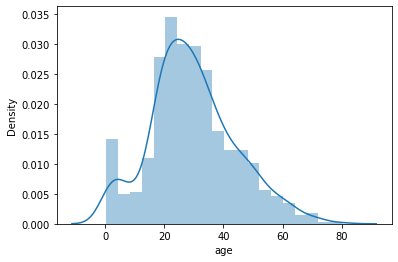

In [28]:
# Distance plot
sns.distplot(ks_clean['age']);

Let's remove the outliers and see how the above bell curve can be improved.

In [29]:
# Find the mean of column 'age' (before removing outliers)
ks_clean['age'].mean()

29.64209269662921

In [30]:
# Remove outliers
ks_clean = ks_clean[ks_clean['age']<63]
ks_clean.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [31]:
# Check shape
ks_clean.shape

(697, 14)

In [32]:
# Find the mean of column 'age' (after removing outliers)
ks_clean['age'].mean()

28.81444763271162

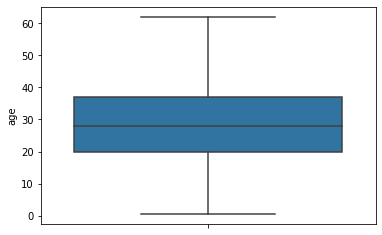

In [33]:
# Draw boxplot after outliers removel
sns.boxplot(y='age', data=ks_clean);

c:\Users\awon\Desktop\40days_of_Data_Science\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


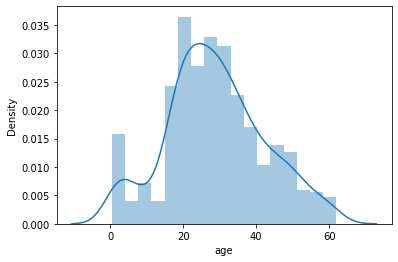

In [34]:
# Visualize bell curve with distance plot
sns.distplot(ks_clean['age']);

That looks much better

In [35]:
ks_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


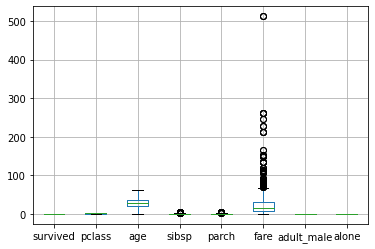

In [36]:
# Visualize the outliers of all columns in one figure
ks_clean.boxplot();

Remove just the one outlier in `fare` column that has the most distance from others. (~300)

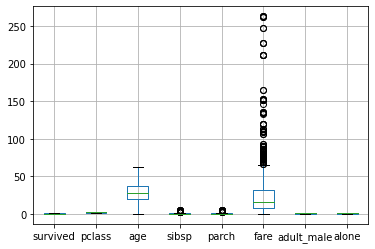

In [37]:
# Remove one outlier above ~300
ks_clean = ks_clean[ks_clean['fare']<300]
ks_clean.boxplot();

c:\Users\awon\Desktop\40days_of_Data_Science\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


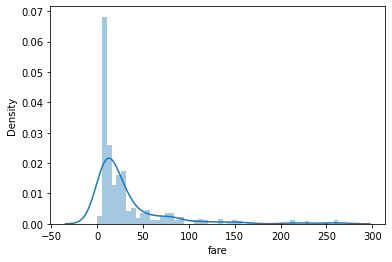

In [38]:
# Plot bar curve
# notice 'fare' has lots of skews which can be handled
# with differen statistical operations (e.g. log transformation)
sns.distplot(ks_clean['fare']);

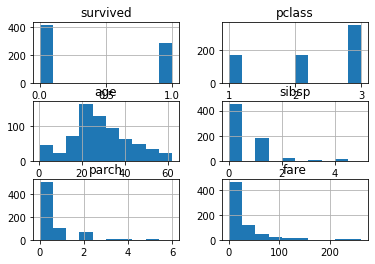

In [39]:
# Plot hist
ks_clean.hist();

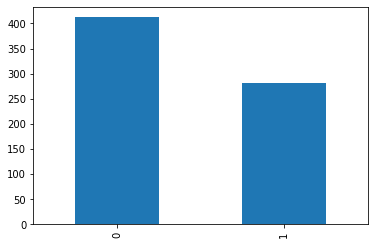

In [40]:
# Bar plot between unique values of a column
pd.value_counts(ks_clean['survived']).plot.bar();

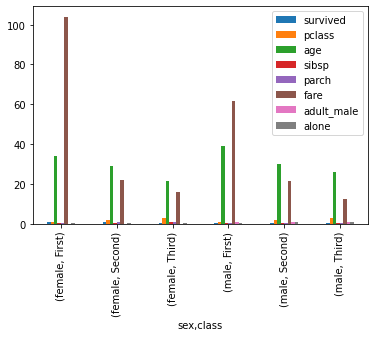

In [41]:
# Bar plot the mean of every column based on 'sex' and 'class'
ks_clean.groupby(['sex', 'class']).mean().plot.bar();

Let's groupby the mean of column 'sex' and 'class' in the original dataset (without cleaning) and compare it with the cleaned dataset.

Notice how results are improved in dataset after cleaning.

In [42]:
# Original dataset
ks.groupby(['sex', 'class']).mean()

survived  pclass        age     sibsp     parch        fare  \
sex    class                                                                 
female First   0.968085     1.0  34.611765  0.553191  0.457447  106.125798   
       Second  0.921053     2.0  28.722973  0.486842  0.605263   21.970121   
       Third   0.500000     3.0  21.750000  0.895833  0.798611   16.118810   
male   First   0.368852     1.0  41.281386  0.311475  0.278689   67.226127   
       Second  0.157407     2.0  30.740707  0.342593  0.222222   19.741782   
       Third   0.135447     3.0  26.507589  0.498559  0.224784   12.661633   

               adult_male     alone  
sex    class                         
female First     0.000000  0.361702  
       Second    0.000000  0.421053  
       Third     0.000000  0.416667  
male   First     0.975410  0.614754  
       Second    0.916667  0.666667  
       Third     0.919308  0.760807

In [43]:
# Cleaned dataset
ks_clean.groupby(['sex', 'class']).mean()

survived  pclass        age     sibsp     parch        fare  \
sex    class                                                                 
female First   0.962963     1.0  33.876543  0.555556  0.518519  104.014147   
       Second  0.918919     2.0  28.722973  0.500000  0.621622   21.951070   
       Third   0.455446     3.0  21.341584  0.831683  0.960396   15.937625   
male   First   0.406593     1.0  38.993626  0.395604  0.296703   61.517307   
       Second  0.154639     2.0  29.972474  0.381443  0.247423   21.331959   
       Third   0.152000     3.0  25.987680  0.496000  0.260000   12.215548   

               adult_male     alone  
sex    class                         
female First     0.000000  0.358025  
       Second    0.000000  0.405405  
       Third     0.000000  0.366337  
male   First     0.967033  0.527473  
       Second    0.907216  0.628866  
       Third     0.888000  0.736000

# Relationship between data

In [44]:
# Find correlation
corr_ks_clean = ks_clean.corr()
corr_ks_clean

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.367155,-0.067449,-0.017200,0.102375,0.285948,-0.550032,-0.201366
pclass,-0.367155,1.000000,-0.359977,0.061823,0.031390,-0.621404,0.110177,0.152942
age,-0.067449,-0.359977,1.000000,-0.312536,-0.202886,0.089950,0.275887,0.191512
sibsp,-0.017200,0.061823,-0.312536,1.000000,0.383591,0.197070,-0.311020,-0.629484
parch,0.102375,0.031390,-0.202886,0.383591,1.000000,0.235458,-0.378772,-0.575658
fare,0.285948,-0.621404,0.089950,0.197070,0.235458,1.000000,-0.240127,-0.329305
adult_male,-0.550032,0.110177,0.275887,-0.311020,-0.378772,-0.240127,1.000000,0.404531
alone,-0.201366,0.152942,0.191512,-0.629484,-0.575658,-0.329305,0.404531,1.000000


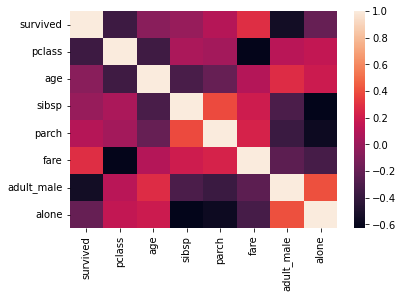

In [45]:
# Draw heatmap
sns.heatmap(corr_ks_clean);

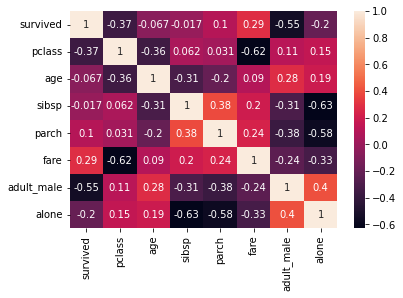

In [46]:
# Add anotation in heatmap
sns.heatmap(corr_ks_clean, annot=True);

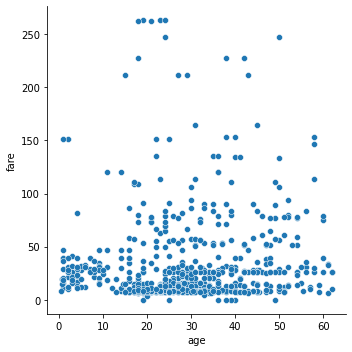

In [47]:
# Draw correlation plot between two numeric variables (has to be numeric)
sns.relplot(x='age', y='fare', data=ks_clean);

Notice there is no high correlation (positive or negative) between `age` and `fare`, that exactly what `heatmap` is telling us above.

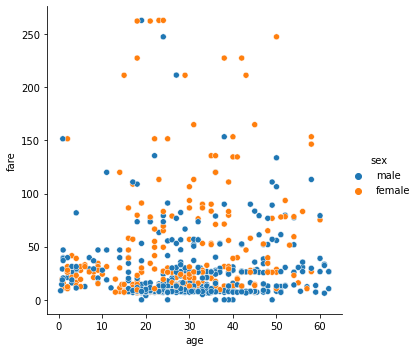

In [48]:
# Group together 'age' and 'fare' with 'sex using hue
sns.relplot(x='age', y='fare', hue='sex', data=ks_clean);

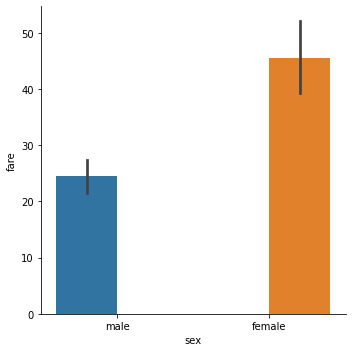

In [49]:
# Draw categorical plot
sns.catplot(x='sex', y='fare', hue='sex', data=ks_clean, kind='bar');

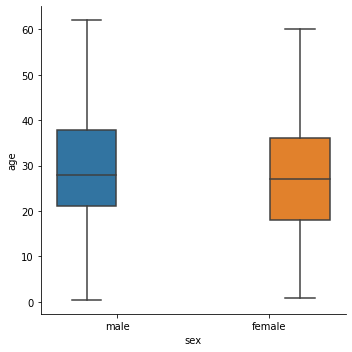

In [50]:
# Another categorical plot
sns.catplot(x='sex', y='age', hue='sex', data=ks_clean, kind='box');

Lets take the log transformation of `fare` and then visualize comparison.

In [51]:
# Take log transformation of 'fare' and
# add new column in the dataframe
ks_clean['fare_log'] = np.log(ks_clean['fare'])
ks_clean.head()

c:\Users\awon\Desktop\40days_of_Data_Science\venv\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,fare_log
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,1.981001
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,4.266662
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,2.070022
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,3.972177
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,2.085672


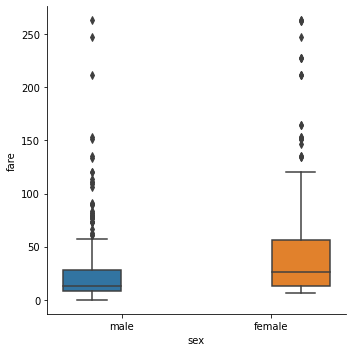

In [53]:
# Plot without log transformation
sns.catplot(x='sex', y='fare', hue='sex', data=ks_clean, kind='box');

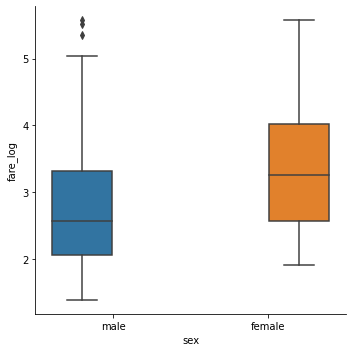

In [52]:
# Plot with log transformation
sns.catplot(x='sex', y='fare_log', hue='sex', data=ks_clean, kind='box');

For quick comparison

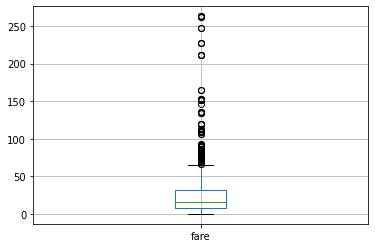

In [56]:
ks_clean.boxplot('fare');

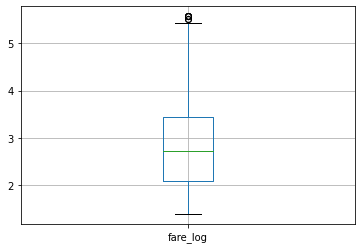

In [55]:
ks_clean.boxplot('fare_log');